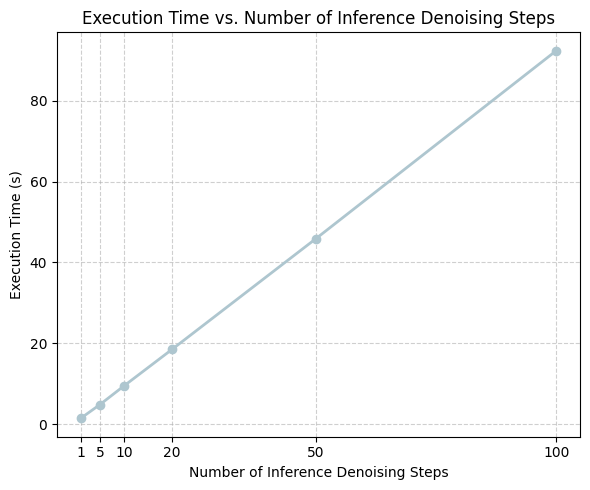

In [2]:
import matplotlib.pyplot as plt

# Data
steps = [1, 5, 10, 20, 50, 100]
execution_time = [1.41, 4.81, 9.43, 18.47, 45.93, 92.44]

# Plot
plt.figure(figsize=(6, 5))
plt.plot(steps, execution_time, marker='o', color='#AEC6CF', linewidth=2)  # pastel blue
plt.title('Execution Time vs. Number of Inference Denoising Steps')
plt.xlabel('Number of Inference Denoising Steps')
plt.ylabel('Execution Time (s)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(steps)
plt.tight_layout()
plt.show()


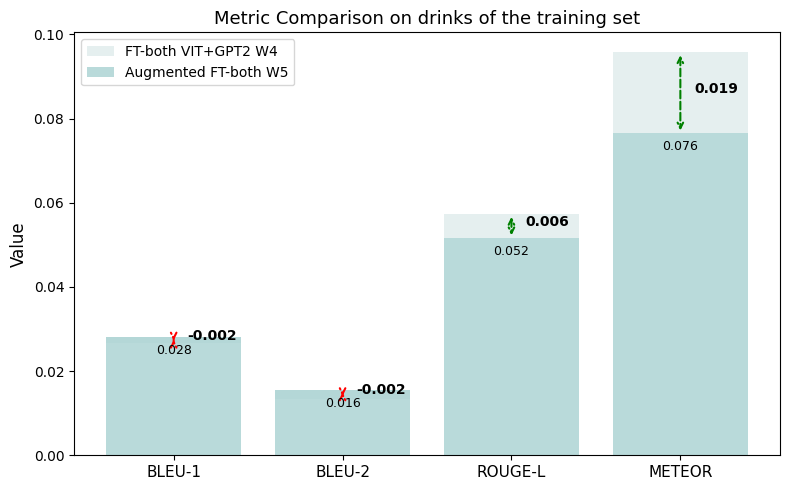

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `df` is your actual DataFrame
# Extract the last non-NaN value for each metric
initial_values = pd.Series({'BLEU-1': 0.0281, 'BLEU-2': 0.0156, 'ROUGE-L': 0.0516, 'METEOR': 0.0765})  

# Final values
final_values = pd.Series({'BLEU-1': 0.0266, 'BLEU-2': 0.0134, 'ROUGE-L': 0.0573, 'METEOR': 0.0957})

# Calculate increase
increase = final_values - initial_values

# Define pastel colors for the bars
initial_color = "#A8D1D1"   # Soft pastel blue
increase_color = "#DFEBEB"  # Soft pastel tone for change

# Create bar plot
fig, ax = plt.subplots(figsize=(8, 5))
x_labels = ['BLEU-1', 'BLEU-2', 'ROUGE-L', 'METEOR']
x = range(len(x_labels))

# Plot increase bars
ax.bar(x, increase.values, bottom=initial_values.values, label="FT-both VIT+GPT2 W4", alpha=0.8, color=increase_color)

# Plot initial values bars
ax.bar(x, initial_values.values, label="Augmented FT-both W5", alpha=0.8, color=initial_color)

# Add arrows and text
for i, (init, inc) in enumerate(zip(initial_values.values, increase.values)):
    final = init + inc
    mid = (init + final) / 2  # Midpoint for arrow text
    improved = inc > 0

    # Arrow color: green if improved, red if worse
    arrow_color = 'green' if improved else 'red'

    # Draw the arrow
    ax.annotate("", xy=(i, init), xycoords='data',
                xytext=(i, final), textcoords='data',
                arrowprops=dict(arrowstyle='<->', linestyle='dashed', color=arrow_color, lw=1.5))

    # Text format
    text = f'{inc:.3f}' if improved else f'-{abs(inc):.3f}'
    
    # Add annotation text
    ax.annotate(text, 
                xy=(i, mid), xycoords='data',  
                xytext=(10, 0), textcoords='offset points',
                ha='left', fontsize=10, fontweight='bold', color='black')

# Add values below the bars of initial_values
for i, value in enumerate(initial_values.values):
    if value != 0:
        ax.annotate(f'{value:.3f}', 
                    xy=(i, value),
                    xytext=(0, -5),
                    textcoords='offset points',
                    ha='center',
                    va='top',
                    fontsize=9,
                    color='black')

# Labels and legend
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=11)
ax.set_ylabel("Value", fontsize=12)
ax.set_title("Metric Comparison on drinks of the training set", fontsize=13)
ax.legend()

plt.tight_layout()
plt.show()

